c:\Users\Dreamoon\anaconda3\envs\gpu_test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
--- CLIP Context ---
Context Shape: torch.Size([2, 77, 768])
Context Min: -28.09117889404297
Context Max: 33.063209533691406
Context Mean: -0.10838727653026581
Context Std: 1.0316375494003296
Context NaN: False
🔍 [2] Adding noise at Timestep: 880
🔍 [3] After Add_Noise Stats:
    Std: 0.9947, Mean: -0.0051
🔍 [1] Encoder Output Stats:
    Std: 0.9947, Mean: -0.0051


100%|██████████| 45/45 [00:05<00:00,  7.51it/s]


--- Images after decoding (float) ---
Images Shape: torch.Size([1, 3, 512, 512])
Images Min: -1.0361030101776123
Images Max: 1.086474061012268
Images Mean: -0.17199158668518066
Images Std: 0.39929187297821045
Images NaN: False
--- 图像数组数值检查 ---
Shape (形状): (512, 512, 3)
Dtype (类型): uint8
Min (最小值): 0
Max (最大值): 255
Mean (平均值): 105.07078425089519
Std Dev (标准差): 50.907646965941666
是否包含 NaN: False
是否包含 Inf: False


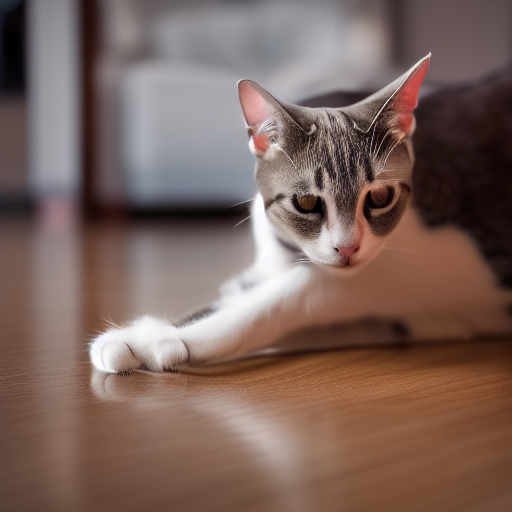

In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch
import numpy as np

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
# tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
model = model_loader.preload_models_from_standard_weights(model_file, device=DEVICE)    

## TEXT TO IMAGE

prompt = "A dog stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

## IMAGE TO IMAGE

input_image = None
image_path = "../images/dog.jpg"
input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=model,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

print("--- 图像数组数值检查 ---")

# 1. 打印基础信息 (最重要)
print(f"Shape (形状): {output_image.shape}")
print(f"Dtype (类型): {output_image.dtype}")

# 2. 打印统计数据 (揭示问题)
print(f"Min (最小值): {np.min(output_image)}")
print(f"Max (最大值): {np.max(output_image)}")
print(f"Mean (平均值): {np.mean(output_image)}")
print(f"Std Dev (标准差): {np.std(output_image)}")

# 3. 检查无效值 (致命错误)
print(f"是否包含 NaN: {np.isnan(output_image).any()}")
print(f"是否包含 Inf: {np.isinf(output_image).any()}")

Image.fromarray(output_image)

In [2]:
import torch
print(torch.cuda.is_available())

True
